In [20]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

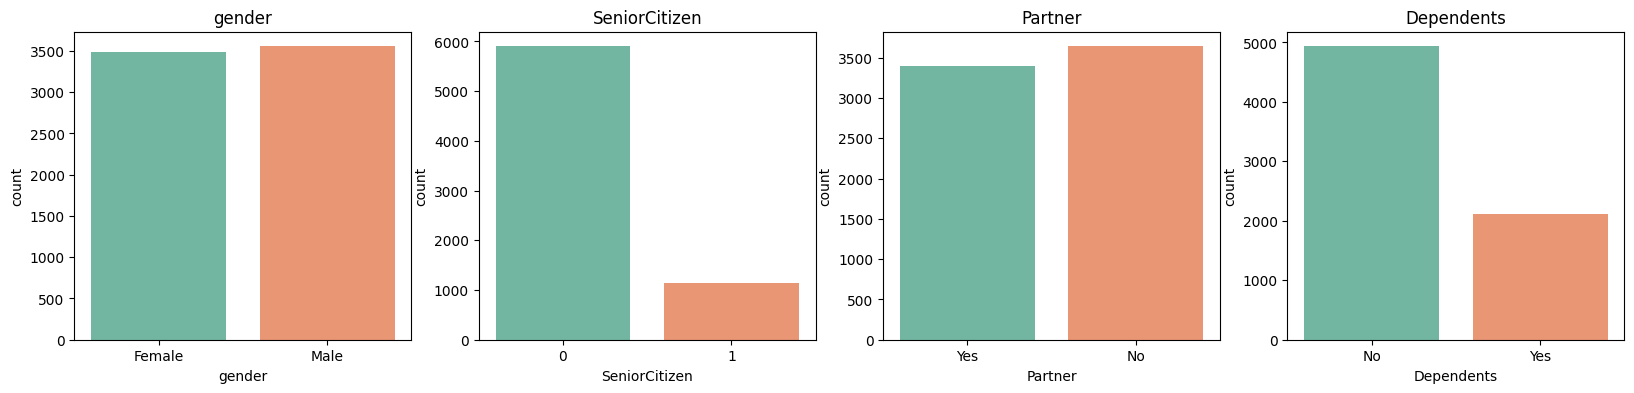

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), hue=str(col), data=df, palette="Set2", legend=False)  # Changes here
    ax.set_title(f"{col}")

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

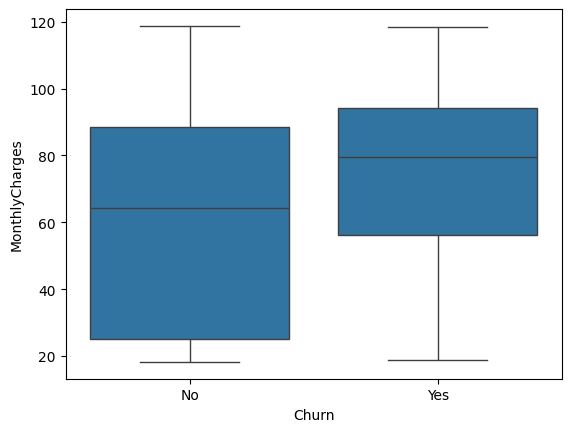

In [24]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

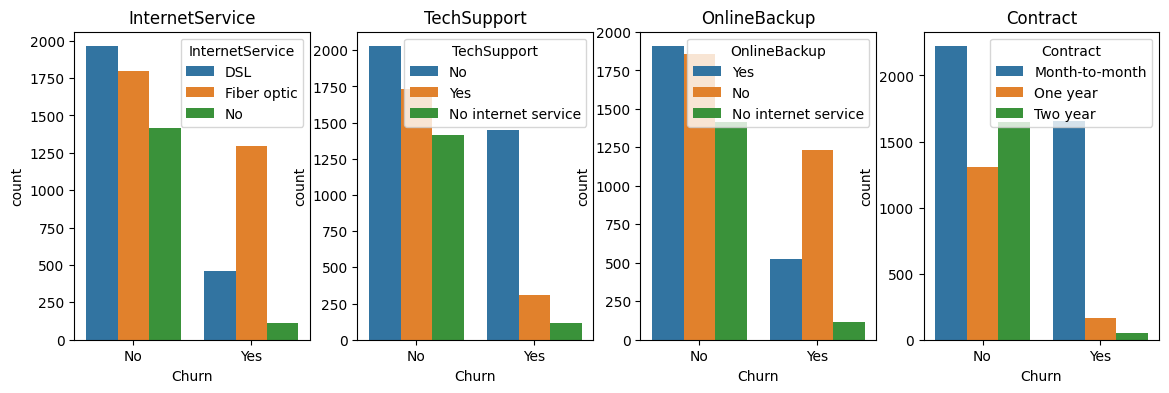

In [25]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

In [26]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [27]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [28]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)



In [29]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerID'],axis=1)

X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [31]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [32]:
y_train.value_counts()

Churn
0    3452
1    3452
Name: count, dtype: int64

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [34]:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))



0.7742352434295562


In [41]:
pip install xgboost



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [45]:
# comparison between different models
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

import pandas as pd

# Create a dictionary to store results
results = {}

# 1. Random Forest
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
results["Random Forest"] = classification_report(y_test, rf_preds, output_dict=True)

# 2. XGBoost
xgb = XGBClassifier(random_state=46, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
results["XGBoost"] = classification_report(y_test, xgb_preds, output_dict=True)

# 3. Gradient Boosting
gbc = GradientBoostingClassifier(random_state=46)
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)
results["Gradient Boosting"] = classification_report(y_test, gbc_preds, output_dict=True)

# 4. AdaBoost
abc = AdaBoostClassifier(random_state=46, algorithm='SAMME')
abc.fit(X_train, y_train)
abc_preds = abc.predict(X_test)
results["AdaBoost"] = classification_report(y_test, abc_preds, output_dict=True)

# Convert results into a DataFrame for comparison
comparison_df = pd.DataFrame({
    model: {
        "Accuracy": metrics["accuracy"],
        "Precision (Class 0)": metrics["0"]["precision"],
        "Recall (Class 0)": metrics["0"]["recall"],
        "F1-Score (Class 0)": metrics["0"]["f1-score"],
        "Precision (Class 1)": metrics["1"]["precision"],
        "Recall (Class 1)": metrics["1"]["recall"],
        "F1-Score (Class 1)": metrics["1"]["f1-score"],
    }
    for model, metrics in results.items()
}).T

print("Comparison of Models:\n")
print(comparison_df)


Comparison of Models:

                   Accuracy  Precision (Class 0)  Recall (Class 0)  \
Random Forest      0.774235             0.852644          0.838691   
XGBoost            0.756570             0.843938          0.821742   
Gradient Boosting  0.762171             0.875567          0.789597   
AdaBoost           0.748384             0.889426          0.752192   

                   F1-Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
Random Forest                0.845610             0.567398          0.593443   
XGBoost                      0.832692             0.534351          0.573770   
Gradient Boosting            0.830363             0.537275          0.685246   
AdaBoost                     0.815073             0.514874          0.737705   

                   F1-Score (Class 1)  
Random Forest                0.580128  
XGBoost                      0.553360  
Gradient Boosting            0.602305  
AdaBoost                     0.606469  


In [46]:
# saving the best model which is Random Forest
import pickle

# Save the RandomForest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [47]:
with open('random_forest_model.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)